# Imports

In [2]:
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
def linear(X, a, b):
    return X * a + b

In [4]:
def rational(X, a, b):
    return a / (1 + b * X)

In [5]:
def loss(func, X, a, b, y_true, reduction=True):
    approx = func(X, a, b)
    if reduction:
        return np.sum((approx - y_true) ** 2)
    else:
        return approx - y_true


# Load all data

In [13]:
# Ground-truth values
alpha = 0.6121701756176187 
beta = 0.16906975434563642

# Data from previous task
opt_data = pd.read_csv('task2_data_2d.csv')
approx_direct = pd.read_csv('task2_2d.csv')
approx_direct.sort_values(['approx_func', 'method'])

# Data from this task
approx_grad = pd.read_csv('task3.csv')
approx_grad.sort_values(['approx_func', 'method'])

,method,approx_func,loss,a,b,iterations
2,conj_gd,linear,93.209323,0.781950,0.087272,5
0,gd,linear,93.209323,0.781943,0.087276,827
6,lm,linear,93.209323,0.781950,0.087272,2
4,newton,linear,93.209323,0.781950,0.087272,5
3,conj_gd,rational,94.753980,0.299199,-0.660520,26
1,gd,rational,94.753980,0.299201,-0.660516,326
7,lm,rational,94.753982,0.299324,-0.660241,12
5,newton,rational,94.753980,0.299200,-0.660518,16


# Charts

In [10]:
plt.rcParams["figure.figsize"] = (10, 8)
METHODS = {'brute_force_opt': 'Brute Force',
           'gauss_opt': 'Gauss',
           'nelder_mead_opt': 'Nelder-Mead',
           'gd': 'Gradient Descent',
           'conj_gd': 'Conjugate Gradient Descent',
           'newton': 'Newton\'s',
           'lm': 'Levenberg-Marquardt'}

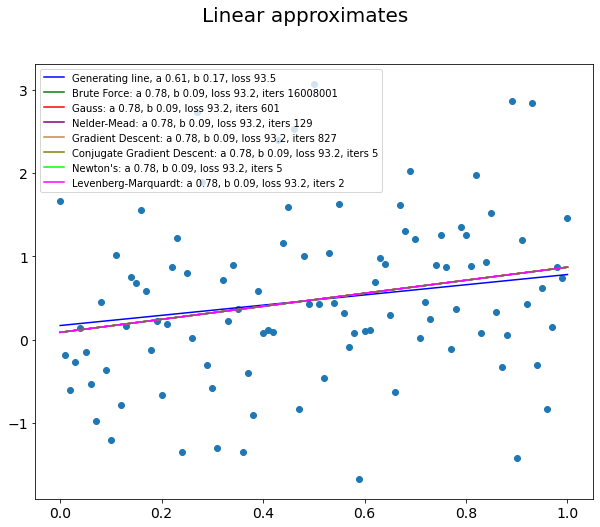

In [11]:
plt.scatter(opt_data['X'], opt_data['y'])
true_loss = loss(linear, opt_data['X'], alpha, beta, opt_data['y'])
plt.plot(opt_data['X'], opt_data['y_clean'], c='blue', label=f'Generating line, a {alpha:.2f}, b {beta:.2f}, loss {true_loss:.1f}')
for method, color in zip(['brute_force_opt', 'gauss_opt', 'nelder_mead_opt'],
                         ['green', 'red', 'purple']):
    row = approx_direct[(approx_direct['method'] == method) & (approx_direct['approx_func'] == 'linear_approx')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = linear(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')
    
for method, color in zip(['gd', 'conj_gd', 'newton', 'lm'],
                         ['peru', 'olive', 'lime', 'magenta']):
    row = approx_grad[(approx_grad['method'] == method) & (approx_grad['approx_func'] == 'linear')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = linear(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Linear approximates', fontsize=20)
plt.show();

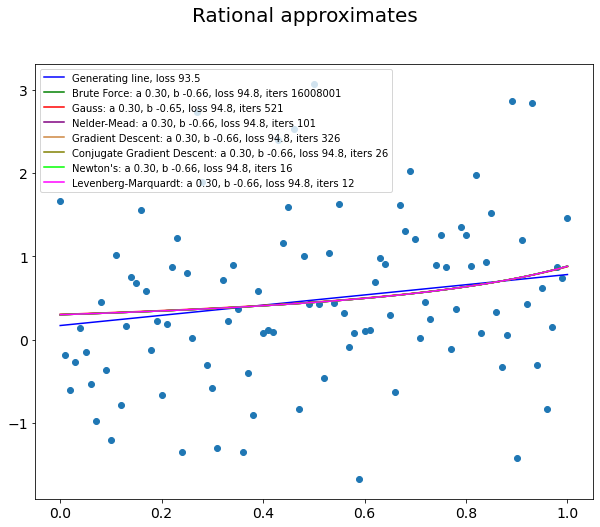

In [12]:
plt.scatter(opt_data['X'], opt_data['y'])
true_loss = loss(linear, opt_data['X'], alpha, beta, opt_data['y'])
plt.plot(opt_data['X'], opt_data['y_clean'], c='blue', label=f'Generating line, loss {true_loss:.1f}')
for method, color in zip(['brute_force_opt', 'gauss_opt', 'nelder_mead_opt'],
                         ['green', 'red', 'purple']):
    row = approx_direct[(approx_direct['method'] == method) & (approx_direct['approx_func'] == 'rational_approx')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = rational(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')
    
for method, color in zip(['gd', 'conj_gd', 'newton', 'lm'],
                         ['peru', 'olive', 'lime', 'magenta']):
    row = approx_grad[(approx_grad['method'] == method) & (approx_grad['approx_func'] == 'rational')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = rational(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Rational approximates', fontsize=20)
plt.show();